# Understaning ViT

## All the required imports

In [10]:
from transformers import ViTModel
from transformers import AutoFeatureExtractor
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

## Loading ViT model

Model used: google/vit-base-patch16-224-in21k 
 > so the model uses 1x16 patches 

 > image size of 224x224
 
 > model pre-trained on imagenet21k dataset

In [2]:
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k') # Load up a pretrained Vision Transformer

vit_model

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): ViTOutput(
          (d

In the model description we can notice the key similarities in the Encoder layer to that of BERT encoder layers.

Also we can notice the difference i.e. The Embeddings which in this are patch_embeddings instead of word_embeddings

In [3]:
feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

feature_extractor # Need to check how images are preprocessed to match how the model was pretrained

/Users/niketgirdhar/.pyenv/versions/3.12.3/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

The FeatureExtractor is what converts image into a tensor which is passed onto the ViT not the raw image itself.

It is similar to the `Tokenizer` in text based tasks in NLP

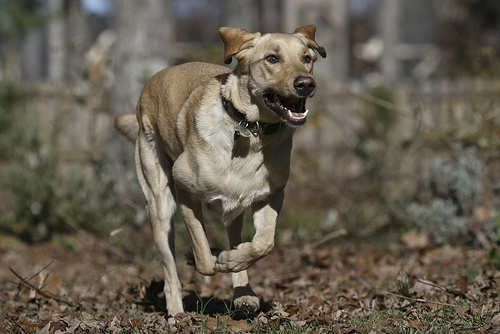

In [4]:
img = Image.open('../../data/flicker_images/3148647065_2d6cd88cf6.jpg') # Pillow's Image object with https://www.kaggle.com/datasets/adityajn105/flickr8k
display(img)

In [5]:
feature_extractor(img)

{'pixel_values': [array([[[-0.4588235 , -0.44313723, -0.45098037, ..., -0.70980394,
         -0.70980394, -0.7254902 ],
        [-0.44313723, -0.45098037, -0.47450978, ..., -0.7176471 ,
         -0.7176471 , -0.7254902 ],
        [-0.46666664, -0.47450978, -0.4823529 , ..., -0.7176471 ,
         -0.7176471 , -0.70980394],
        ...,
        [-0.3960784 , -0.38823527, -0.41176468, ..., -0.30196077,
         -0.1607843 , -0.12941176],
        [-0.34117645, -0.38039213, -0.40392154, ..., -0.2235294 ,
         -0.21568626, -0.45098037],
        [-0.20784312, -0.29411763, -0.3490196 , ..., -0.26274508,
         -0.38823527, -0.23921567]],

       [[-0.3960784 , -0.372549  , -0.372549  , ..., -0.70980394,
         -0.70980394, -0.7254902 ],
        [-0.372549  , -0.372549  , -0.3960784 , ..., -0.7176471 ,
         -0.70980394, -0.7176471 ],
        [-0.3960784 , -0.3960784 , -0.40392154, ..., -0.70980394,
         -0.70980394, -0.7019608 ],
        ...,
        [-0.54509807, -0.5529412 , -

pixel_values tensor: This is what will be fed to the image transformer model

In [8]:
feature_extractor(img).pixel_values[0].shape

(3, 224, 224)

Shape: (3,224,224)

> 3: means the image is colored, RGB values

> 224,224: feature extractor has changed the size of image to 224x224, a square image which the original image is not

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.79607844].


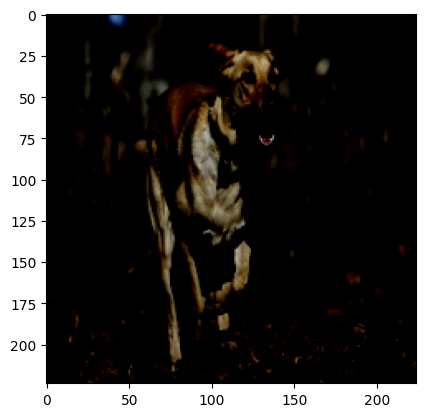

In [11]:
plt.imshow(feature_extractor(img).pixel_values[0].transpose(1, 2, 0))

The output image is a square image